In [1]:
from models import GPRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, RationalQuadratic, WhiteKernel
import pandas as pd

kernel = ConstantKernel() * RBF() + WhiteKernel()
model = GPRegression(kernel=kernel)
test_input = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
model.set_test_input(test_input=test_input)

In [55]:
def visualize(model):
		# by default use self.test_input
		prediction_dict, kernel_params = model.train_predict()

		# fig, ax = plt.subplots(1, len(prediction_dict.keys()))
		plt.figure()
		for i, (metric, y_train) in enumerate(model.y_dict.items()):
			plt.scatter(model.X, y_train, marker='o')
			y_pred = prediction_dict[metric][0].flatten()
			pred_var = prediction_dict[metric][1].flatten()
			plt.plot(model.test_input.flatten(), y_pred, linestyle='--', color='black')
			plt.fill_between(model.test_input.flatten(), y_pred-pred_var, y_pred+pred_var, alpha=0.3)
			plt.title(f"{kernel_params['y']}")
			# plt.ylim(0, 15)
		
		plt.show()

In [7]:
X_train = [1]
y_train = [1]
model.add_training_data(X_train, {'y': y_train})
# prediction_dict = model.train_predict(test_input=test_input)

In [24]:
model.add_training_data([2, 2], {'y': [-1, 5]})

In [13]:
model.set_test_input([0.2, 1.0])

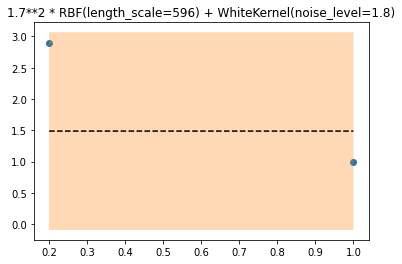

In [14]:
visualize(model)
# print("var for 2: ", model.prediction_dict['y'][1][2])
# print("var for 3: ", model.prediction_dict['y'][1][3])

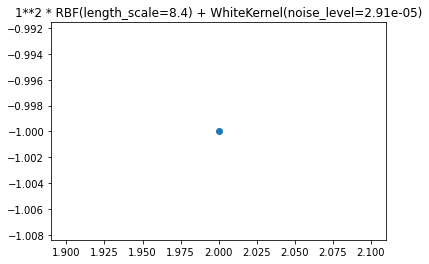

array([-0.99997086])

In [78]:
kernel2 = ConstantKernel() * RBF() + WhiteKernel()
model2 = GPRegression(kernel=kernel2)
model2.add_training_data(train_inputs=[2], train_output_dict={'y': [-1]})
model2.set_test_input([2])
visualize(model2)
model2.prediction_dict['y'][0]

In [63]:
model2.X

array([[2]])

In [64]:
model2.test_input

array([[1],
       [2],
       [3],
       [4],
       [5]])